In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [19]:
df = pd.read_csv("../input/house-data-set/house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [22]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

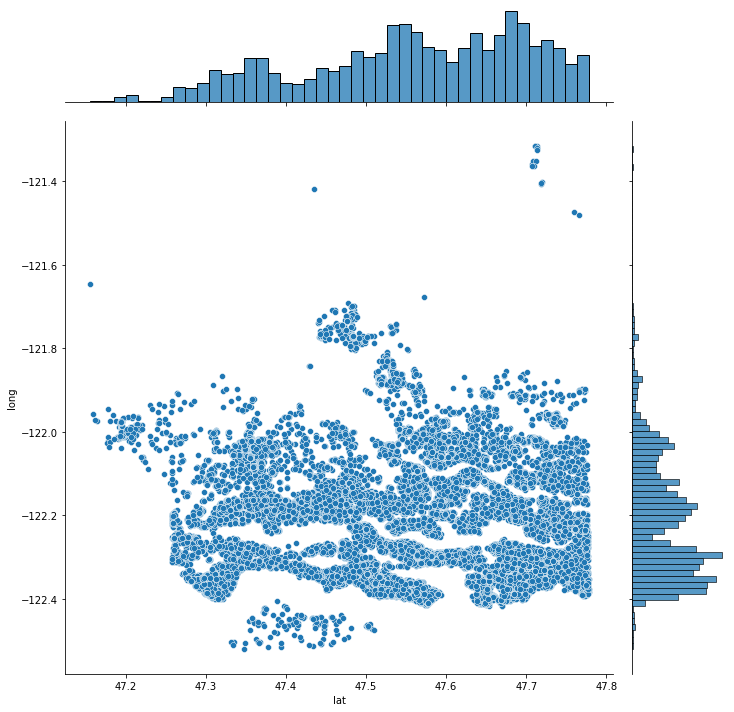

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [23]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat, y=df.long, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

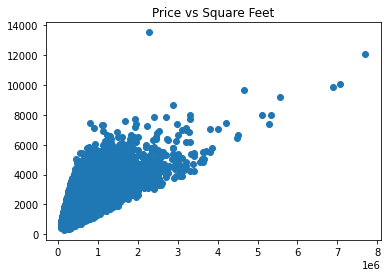

In [24]:
plt.scatter(df.price , df.sqft_living)
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

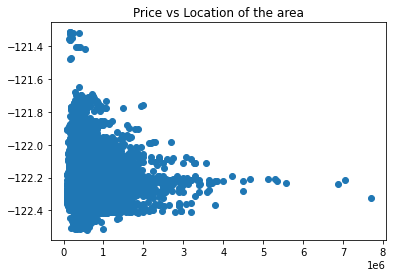

In [25]:
plt.scatter(df.price,df.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

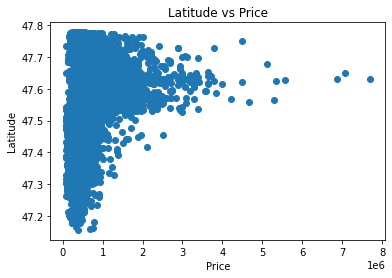

In [26]:
plt.scatter(df.price,df.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

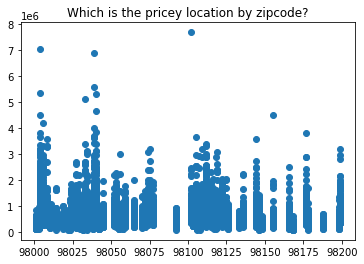

In [27]:
plt.scatter(df.zipcode,df.price)
plt.title("Which is the pricey location by zipcode?")

In [42]:
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


In [44]:
df.drop(columns = ["date" , "id"] , inplace = True )

In [51]:
conv_dates = [1 if values == 2014 else 0 for values in df.year ]
df['year'] = conv_dates

In [109]:
X = df.drop(columns = "price")
y = df.price
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 1234)
scaler = StandardScaler()
scaler.fit(X)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train_c = sm.add_constant(scaled_X_train)

In [110]:
model = sm.OLS(y_train,scaled_X_train_c)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2235.
Date:                Thu, 23 Sep 2021   Prob (F-statistic):               0.00
Time:                        18:14:44   Log-Likelihood:            -2.3573e+05
No. Observations:               17290   AIC:                         4.715e+05
Df Residuals:                   17271   BIC:                         4.716e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.406e+05   1535.763    352.038      0.000    5.38e+05    5.44e+05
x1         -3.356e+04   1952.003    -17.194      0.000   -3.74e+04   -2.97e+04
x2          3.358e+04   2821.360     11.900      0.000     2.8e+04    3.91e+04
x3          8.258e+04   1787.530     46.198      0.000    7.91e+04    8.61e+04
x4          3207.0624   2197.203      1.460      0.144   -1099.679    7513.804
x5          4840.6685   2168.336      2.232      0.026     590.511    9090.826
x6          4.808e+04   1684.209     28.545      0.000    4.48e+04    5.14e+04
x7          4.042e+04   1853.498     21.809      0.000    3.68e+04    4.41e+04
x8          1.904e+04   1707.129     11.155      0.000    1.57e+04    2.24e+04
x9          1.126e+05   2835.627     39.716      0.000    1.07e+05    1.18e+05
x10         7.727e+04   1903.883     40.583      0.000    7.35e+04     8.1e+04
x11          2.68e+04   1745.075     15.360      0.000    2.34e+04    3.02e+04
x12        -7.952e+04   2397.949    -33.162      0.000   -8.42e+04   -7.48e+04
x13         7526.7996   1665.036      4.521      0.000    4263.161    1.08e+04
x14        -3.142e+04   1975.550    -15.903      0.000   -3.53e+04   -2.75e+04
x15         8.394e+04   1671.236     50.226      0.000    8.07e+04    8.72e+04
x16        -2.994e+04   2062.793    -14.514      0.000    -3.4e+04   -2.59e+04
x17         1.569e+04   2631.487      5.962      0.000    1.05e+04    2.08e+04
x18        -1.044e+04   2199.073     -4.746      0.000   -1.47e+04   -6126.322
x19        -1.547e+04   1538.305    -10.054      0.000   -1.85e+04   -1.25e+04
==============================================================================
Omnibus:                    14759.247   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1466319.169
Skew:                           3.592   Prob(JB):                         0.00
Kurtosis:                      47.539   Cond. No.                     5.69e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.79e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [111]:
scaled_X_test_c = sm.add_constant(scaled_X_test)
pred = results.predict(scaled_X_test_c)


In [112]:
print("R squared:",0.700)
print("Mean Absolute error:",mean_absolute_error(y_test,pred))

R squared: 0.7
Mean Absolute error: 124872.0277696965


In [113]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')

In [114]:
clf.fit(scaled_X_train,y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [115]:
print("R squared:",clf.score(scaled_X_test,y_test))
pred = clf.predict(scaled_X_test)
print("MAE for GBM regression:", mean_absolute_error(y_test,pred))

R squared: 0.8903362052813526
MAE for GBM regression: 64168.394674033385
